<a href="https://colab.research.google.com/github/rubeshajith/NYC-taxi-trip-time-prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
df = pd.read_csv("/content/drive/MyDrive/data/project/NYC Taxi Data.csv")

In [96]:
df.shape

(1458644, 11)

In [97]:
df[df.isnull()].sum()

id                      0
vendor_id             0.0
pickup_datetime         0
dropoff_datetime        0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag      0
trip_duration         0.0
dtype: object

In [98]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [100]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [101]:
import datetime as dt

Converting datatype from object to datetime, So that we can use them for creating separate features 

In [102]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

In [103]:
df["pickup_day"] = df["pickup_datetime"].dt.day_name()
df["dropoff_day"] = df["dropoff_datetime"].dt.day_name()

In [104]:
df["pickup_day_no"] = df["pickup_day"].map({"Sunday":0, "Monday":1, "Tuesday":2, "Wednesday": 3, "Thursday": 4, "Friday":5, "Saturday":6})
df["dropoff_day_no"] = df["dropoff_day"].map({"Sunday":0, "Monday":1, "Tuesday":2, "Wednesday": 3, "Thursday": 4, "Friday":5, "Saturday":6})

In [105]:
df["pickup_hour"] = df["pickup_datetime"].dt.hour
df["dropoff_hour"] = df["dropoff_datetime"].dt.hour

In [106]:
df["pickup_month"] = df["pickup_datetime"].dt.month
df["dropoff_month"] = df["dropoff_datetime"].dt.month

In [107]:
def time_of_the_day(x):
  if x in range(6,12):
    return "Morning"
  elif x in range(12,16):
    return "Afternoon"
  elif x in range(16,22):
    return "Evening"
  else: 
    return "Night"

In [108]:
df["pickup_time_of_the_day"] = df["pickup_hour"].apply(time_of_the_day)
df["dropoff_time_of_the_day"] = df["dropoff_hour"].apply(time_of_the_day)

In [109]:
from geopy.distance import great_circle

In [110]:
def cal_distance(pickup_latitude,pickup_logitude,dropoff_latitude,dropoff_longitude):
  start_coordinates = (pickup_latitude, pickup_logitude)
  stop_coordinates = (dropoff_latitude,dropoff_longitude)
  return great_circle(start_coordinates, stop_coordinates).miles

In [111]:
df["distance"] = df.apply(lambda x : cal_distance(x["pickup_latitude"],x["pickup_longitude"],x["dropoff_latitude"],x["dropoff_longitude"]),axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


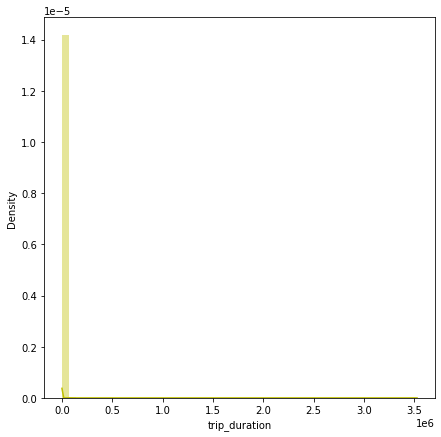

In [112]:
plt.figure(figsize=(7,7))
sns.distplot(df['trip_duration'],color="y")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


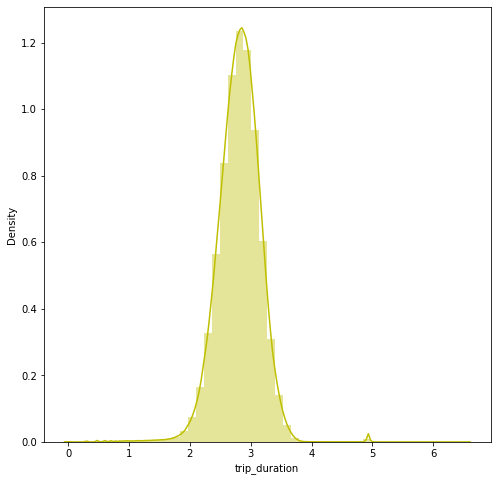

In [114]:
plt.figure(figsize= (8,8))
sns.distplot(np.log10(df.trip_duration), color="y")

After log transformation we can see that our targer variable is normally distrubuted


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


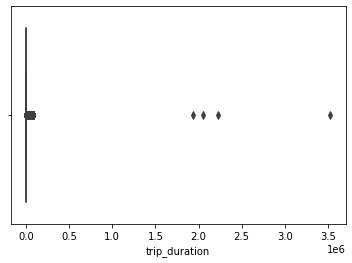

In [70]:
sns.boxplot(df.trip_duration)

We can see few outliers is our target variable


In [131]:
trip_duration_series = df['trip_duration'].sort_values(ascending= False)
trip_duration_series[:4]

978383    3526282
924150    2227612
680594    2049578
355003    1939736
Name: trip_duration, dtype: int64

This 4 data points where the outliers that we detected in boxplot

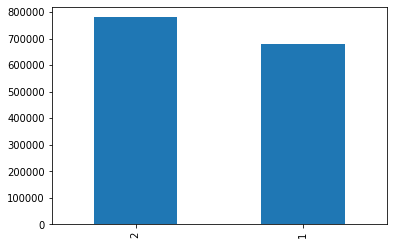

In [17]:
df["vendor_id"].value_counts().plot(kind="bar")